# Using MultiLayer perceptron Model
Other models are: inception-resNet-v2, VGG19 Model, 

# Notebook Imports

In [56]:
from numpy.random import seed  # setting seeds for a fixed random number set
seed(888)
import tensorflow
tensorflow.random.set_seed(404)

In [154]:
import os
import numpy as np
import tensorflow as tf
import itertools # for efficient looping instead of general loops like forloop

import keras
from tensorflow.keras.datasets import cifar10 # cifar10 is a dataset that contains thousands of images used for training image recognition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout # to create the layers: Dense(number of points), Activation(function type), Dropout: to use droput regularisation technique

from IPython.display import display  # to display image from files
from keras.preprocessing.image import array_to_img # preprocess files, transform array to image
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt # visualize

%matplotlib inline

# Constants

In [58]:
LOG_DIR = 'tensorboard_cifar_logs/' # tensorboard infos

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] # labeling names of the arrays(from website)
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [59]:
# X is image values, y is labels
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data() # this will return two tuples for training and testing
type(cifar10)
type(x_train_all)

numpy.ndarray

In [60]:
x_train_all

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# Explore Data

In [61]:
x_train_all[0] # the first image as array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [62]:
y_train_all[0]

array([6], dtype=uint8)

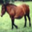

In [63]:
pic = array_to_img(x_train_all[7]) # show image using keras
display(pic)

In [64]:
y_train_all.shape

(50000, 1)

In [65]:
y_train_all[7][0]

7

In [66]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

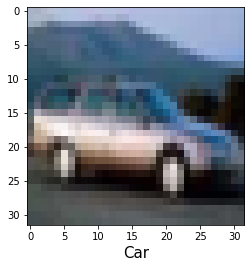

In [67]:
plt.imshow(x_train_all[4]) # show image using plt
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

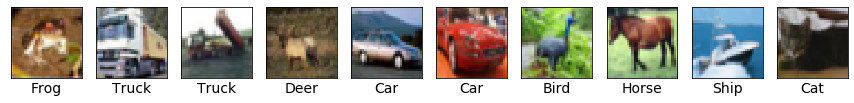

In [68]:
plt.figure(figsize=(15,5))

for i in range(10): # loop to show all images as subplots
    plt.subplot(1, 10, i+1)
    plt.yticks([]) # to remove tick marks(numbers) in the graph axis
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [69]:
x_train_all[0].shape # image format: 32 X 32 pixels, 3 channels(RGB color)

(32, 32, 3)

In [70]:
nr_images, x, y, c = x_train_all.shape # x_train_all contains all 50000 images(Training)
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [71]:
x_test.shape # testing data contains 10000 images

(10000, 32, 32, 3)

# Pre-processing Data

In [72]:
type(x_train_all[0][0][0][0]) # type of individual pixel color: uint8(8-bit unsigned(no +/-) integrer)

numpy.uint8

In [73]:
# transforming the number by dividing by 255(highest RGB value) to make number between 0 and 1, and make them float numbers
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 

In [74]:
type(x_train_all[0][0][0][0]) # transformed into float

numpy.float64

In [75]:
x_train_all.shape

(50000, 32, 32, 3)

In [76]:
''' reshaping x_train_all so that the three values(width, height, channel) are flattened(height*width*channel)
and there is only two columns '''
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [77]:
x_train_all.shape 

(50000, 3072)

In [78]:
x_train_all

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [79]:
# reshaping test data as well
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Splitting data: Add validation Dataset
Before it was Training and Testing. Now it will be Training, Validation, Testing. Dividing by (60, 20, 20)%.
We'll use training data to train the model, validation to find the best model, Testing to test our model. Otherwise we might end up with bad results.

In [80]:
# storing validation data(20%)
x_val = x_train_all[:VALIDATION_SIZE] # : size
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [81]:
# modifying training data(60%)
x_train = x_train_all[VALIDATION_SIZE:] # size :
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [82]:
# Creating a smaller dataset(1000 values) for better performance
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

## Define the Neural Network using Keras
Tensorflow 3 step process: Define model(creating structure), Compile model(calculate loss and accuracy, create graph etc), Fit model

In [111]:
# create perceptron
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'), # first hidden layer
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output') # final layer with 10 inputs for 10 images
])

#compiling model
model_1.compile(optimizer='adam', # choose optimizer: adam uses less memory and is more efficient
                loss='sparse_categorical_crossentropy', # choose loss function: categorical cross entropy(sparse)
                metrics=['accuracy'])

In [112]:
# Another way of creating a model
model_2 = Sequential()
# droput regularisation method. seed is to have same dropouts.
model_2.add(Dropout(0.2 , seed=42, input_shape=(TOTAL_INPUTS,))) # first parameter is dropout percentage(20%)
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

#compiling model
model_2.compile(optimizer='adam', # choose optimizer: adam uses less memory and is more efficient
                loss='sparse_categorical_crossentropy', # choose loss function: categorical cross entropy(sparse)
                metrics=['accuracy'])

In [118]:
# on model 3, adding two dropout layers(20% and 25%)
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [84]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [85]:
model_1.summary() # shows summary of the layers in our model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [86]:
# calculating params
32*32*3*128 + 128 # 393216 + 128(for bias(+1) for each weights) = 393344
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10) # total

402810

# Tensorboard: visualizing learning


In [90]:
def get_tensorboard(model_name):
    # creating folders for each time and each model
    
    # folder name will be the current time
    folder_name = f'{model_name} at {strftime("%H %M")}'  
    dir_paths = os.path.join(LOG_DIR, folder_name) # path will be LOG_DIR + folder_name
    
    # add exception so it won't create another dir when dir exist alreay
    try:
        os.makedirs(dir_paths) # try to create directory
    except OSError as err: # OSError put into variable err
        print(err.strerror) # print the error
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths, profile_batch=0) # returns a tensorboard inside dir_paths

# Fit The Model
### On small dataset

In [93]:
%%time
samples_per_batch = 1000
nr_epochs = 20
# model_1.fit(x_train_xs, y_train_xs, callbacks=[get_tensorboard('Model 1')])

# returns:
'''Successfully created directory
Train on 1000 samples
1000/1000 [==============================] - 0s 252us/sample - loss: 2.2809 - accuracy: 0.1240 # this is 1 epoch
epoch(number of time theintire dataset goes throughthe neural network)
Wall time: 741 ms'''

Wall time: 976 µs


'Successfully created directory\nTrain on 1000 samples\n1000/1000 [==============================] - 0s 252us/sample - loss: 2.2809 - accuracy: 0.1240 # this is 1 epoch\nepoch(number of time theintire dataset goes throughthe neural network)\nWall time: 741 ms'

In [98]:
# model_1.fit(x_train_xs, y_train_xs, epochs=nr_epochs, batch_size=samples_per_batch, callbacks=[get_tensorboard('Model 1')]) # 20 epochs this time
# returns:
'''
Successfully created directory
Train on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 603us/sample - loss: 2.4094 - accuracy: 0.1060
.....
Epoch 20/20
1000/1000 [==============================] - 0s 53us/sample - loss: 2.2455 - accuracy: 0.1710
'''

'\nSuccessfully created directory\nTrain on 1000 samples\nEpoch 1/20\n1000/1000 [==============================] - 1s 603us/sample - loss: 2.4094 - accuracy: 0.1060\n.....\nEpoch 20/20\n1000/1000 [==============================] - 0s 53us/sample - loss: 2.2455 - accuracy: 0.1710\n'

In [101]:
%%time
# with 20 epochs, model was learning. but with 150 more iteration the model will learn better accuracy

#nr_epochs = 150
#model_1.fit(x_train_xs, y_train_xs, epochs=nr_epochs, batch_size=samples_per_batch, 
#            callbacks=[get_tensorboard('Model 1')], verbose=0) # verbose set to 0 to not show all 150 outputs

# result: this new training will start from where the first iteration left off. To make it start over again re-run compiling

Successfully created directory
Wall time: 6.33 s


In [105]:
%%time
# also adding the validation data
r_epochs = 150
model_1.fit(x_train_xs, y_train_xs, epochs=nr_epochs, batch_size=samples_per_batch, 
            callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 38.9 s


#### Overfitting: 
When the model iterates too many times, it learns too much, and thus at one point it doesn't understand the next move as it became too good, and starts to overfit. It makes the epoch_loss higher.
#### Underfitting: 
When the model iterates too little, so it hasn't been able to learn that much, so it also makes the epoch_loss high.
#### Solution: Regularisation
The way to avoid overfitting is regularisation.
1. One of the technique is called early stopping. By reducing the number of iterations, the model can avoid overfitting.
2. Another technique is called dropout. Where one or more random nuerons(inputs) will be dropped out in every iteration. But the model learns slowly


In [108]:
%%time
# also adding the validation data
r_epochs = 150
model_2.fit(x_train_xs, y_train_xs, epochs=nr_epochs, batch_size=samples_per_batch, 
            callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 35.6 s


### On large dataset

In [115]:
%%time
# model with no change
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 2min 10s


In [116]:
%%time
# model with 1 dropout layer implemented
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 3min 12s


In [119]:
%%time
# model with two dropout layers implemented
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 3min 31s


# Predictions on individual images

In [122]:
x_val[0].shape # first image of x_val

(3072,)

In [123]:
# adding another dimension cz the predict method needs a two dimentional array
test = np.expand_dims(x_val[0], axis=0) 
test.shape

(1, 3072)

In [129]:
np.set_printoptions(precision=3) # to round the number to 3
model_2.predict(test) # 10 predictions for the first image using model_2

array([[1.079e-02, 3.029e-03, 1.493e-01, 1.186e-01, 1.402e-01, 1.082e-01,
        4.520e-01, 1.638e-02, 3.208e-04, 1.195e-03]], dtype=float32)

In [131]:
model_2.predict(x_val).shape # the whole dataset of images and 10 preditions for each image

(10000, 10)

In [133]:
model_2.predict_classes(test) # which is the no.1 prediction

array([6], dtype=int64)

In [135]:
y_val[0] # our model predicted the correct class(6) !!

array([6], dtype=uint8)

In [140]:
# for loop to print predicted and actual value for the first ten images\

for xs in range(10):
    reshape = np.expand_dims(x_val[xs], axis=0)
    print('Image no. {0}, Actual: {1}, Predicted: {2}'.format(xs+1, y_val[xs], model_2.predict_classes(reshape)))

Image no. 1, Actual: [6], Predicted: [6]
Image no. 2, Actual: [9], Predicted: [1]
Image no. 3, Actual: [9], Predicted: [9]
Image no. 4, Actual: [4], Predicted: [6]
Image no. 5, Actual: [1], Predicted: [8]
Image no. 6, Actual: [1], Predicted: [9]
Image no. 7, Actual: [2], Predicted: [2]
Image no. 8, Actual: [7], Predicted: [7]
Image no. 9, Actual: [8], Predicted: [8]
Image no. 10, Actual: [3], Predicted: [1]


# Evaluating Model

In [141]:
model_2.metrics_names

['loss', 'accuracy']

In [145]:
# evaluate method returns two of these values
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss is 1.44 and test accuracy is 49.6%


In [146]:
x_test.shape

(10000, 3072)

# Confusion Matrix
Actual vs Predicted values

In [147]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [148]:
conf_matrix.shape # for 10 images

(10, 10)

In [155]:
# 10 rows and colums
nr_rows = conf_matrix.shape[0] 
nr_cols = conf_matrix.shape[1]

In [151]:
conf_matrix.max() # maximum value in the chart

669

In [152]:
conf_matrix.min() # minimum value in the chart

3

In [161]:
conf_matrix[0] # first value [0] out of [10], returns 10 values (10x10)

array([592,  32,  82,  27,  32,  12,  15,  29, 140,  39], dtype=int64)

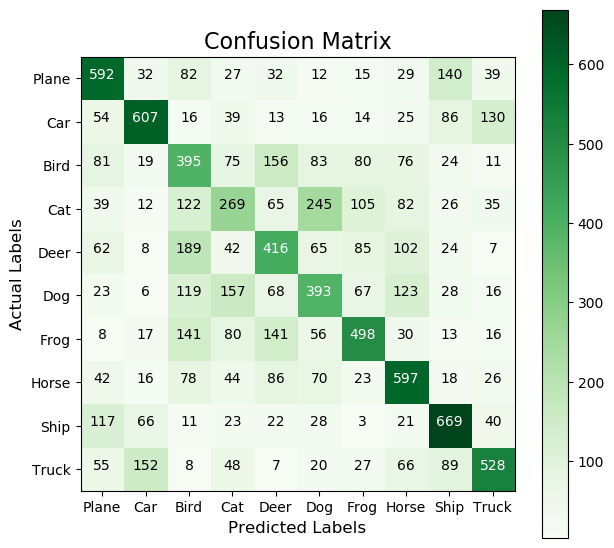

In [165]:
# visualizing chart
plt.figure(figsize=(7,7), dpi=100) # dpi for resolution
plt.imshow(conf_matrix, cmap=plt.cm.Greens) # to show the matrix, add color map cmap green

# labels
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

# formating tick values
tick_marks = np.arange(NR_CLASSES) # 0 to 9
plt.yticks(tick_marks, LABEL_NAMES) # naming the tick marks [plane, ..]
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar() # shows how each color gives each value on a bar

for i, j in itertools.product(range(nr_rows), range(nr_cols)): # using itertools for efficiency
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black') # to put text in the center of each row and colum
            # adding logic to color: if too dark, make text white

plt.show()

## recall, precision, f-score for each category(image)

In [166]:
# True Positives
np.diag(conf_matrix) # diagonals

array([592, 607, 395, 269, 416, 393, 498, 597, 669, 528], dtype=int64)

In [167]:
# recall value
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.592, 0.607, 0.395, 0.269, 0.416, 0.393, 0.498, 0.597, 0.669,
       0.528])

In [168]:
# precision
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.552, 0.649, 0.34 , 0.335, 0.414, 0.398, 0.543, 0.519, 0.599,
       0.623])

In [169]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 49.64%


In [170]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 49.70%


In [171]:
# f-score
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 f score is 49.67%
